In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
from keras.datasets import mnist
(X_train,y_train), (X_test,y_test) = mnist.load_data()

In [4]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
pt_x_train =[]
pt_y_train =[]
pt_x_test =[]
pt_y_test =[]

tl_x_train =[]
tl_y_train =[]
tl_x_test =[]
tl_y_test =[]

In [6]:
# using first 20000
m = 20000
m2= 10000
for i in range(m):
    if y_train[i]<5:
        pt_x_train.append(X_train[i]/255)
        pt_y_train.append(y_train[i])
    else:
        tl_x_train.append(X_train[i]/255)
        tl_y_train.append(y_train[i])
        
for i in range(m2):
    if y_test[i]<5:
        pt_x_test.append(X_test[i]/255)
        pt_y_test.append(y_test[i])
    else:
        tl_x_test.append(X_test[i]/255)
        tl_y_test.append(y_test[i])
        

In [7]:
pt_x_train = np.asarray(pt_x_train).reshape(-1,28,28,1)
pt_y_train = np_utils.to_categorical(np.asarray(pt_y_train))

pt_x_test = np.asarray(pt_x_test).reshape(-1,28,28,1)
pt_y_test = np_utils.to_categorical(np.asarray(pt_y_test))

tl_x_train = np.asarray(tl_x_train).reshape(-1,28,28,1)
tl_y_train = np_utils.to_categorical(np.asarray(tl_y_train))

tl_x_test = np.asarray(tl_x_test).reshape(-1,28,28,1)
tl_y_test = np_utils.to_categorical(np.asarray(tl_y_test))

In [8]:
pt_y_train[:10]

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [9]:
print(pt_x_train.shape, pt_y_train.shape)
print(pt_x_test.shape, pt_y_test.shape)

print(tl_x_train.shape, tl_y_train.shape)
print(tl_x_test.shape, tl_y_test.shape)

(10225, 28, 28, 1) (10225, 5)
(5139, 28, 28, 1) (5139, 5)
(9775, 28, 28, 1) (9775, 10)
(4861, 28, 28, 1) (4861, 10)


In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPool2D, Dropout

In [11]:
#Pre_Train
model = Sequential()

#(28,28,1)
model.add(Conv2D(32,5,input_shape=(28,28,1), activation ='relu'))
#(24,24,32)
model.add(Conv2D(16,5,activation = "relu"))
#(20,20,16)
model.add(MaxPool2D(pool_size=(2,2)))
#10,10,16
model.add(Conv2D(8,3,activation = 'relu'))
#(8,8,8)

model.add(Flatten());

model.add(Dropout(0.4))

model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(5))
model.add(Activation("softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 16)        12816     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 8)           1160      
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [17]:
model.compile(loss="categorical_crossentropy",
             optimizer ='adam',
             metrics = ['accuracy'])

In [18]:
import datetime

In [19]:
start = datetime.datetime.now()
model.fit(pt_x_train,pt_y_train,
         validation_data=(pt_x_test,pt_y_test),
         nb_epoch = 10,
         shuffle=True,
         batch_size =100,
         verbose=2)
end =datetime.datetime.now()
print(end-start)

/home/ashish/Documents/01project3.6_env/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 10225 samples, validate on 5139 samples
Epoch 1/10
 - 16s - loss: 0.3057 - accuracy: 0.9044 - val_loss: 0.0463 - val_accuracy: 0.9852
Epoch 2/10
 - 16s - loss: 0.0749 - accuracy: 0.9768 - val_loss: 0.0356 - val_accuracy: 0.9893
Epoch 3/10
 - 17s - loss: 0.0524 - accuracy: 0.9838 - val_loss: 0.0265 - val_accuracy: 0.9912
Epoch 4/10
 - 18s - loss: 0.0409 - accuracy: 0.9871 - val_loss: 0.0170 - val_accuracy: 0.9944
Epoch 5/10
 - 16s - loss: 0.0330 - accuracy: 0.9881 - val_loss: 0.0139 - val_accuracy: 0.9951
Epoch 6/10
 - 14s - loss: 0.0261 - accuracy: 0.9911 - val_loss: 0.0182 - val_accuracy: 0.9946
Epoch 7/10
 - 14s - loss: 0.0245 - accuracy: 0.9919 - val_loss: 0.0157 - val_accuracy: 0.9947
Epoch 8/10
 - 14s - loss: 0.0175 - accuracy: 0.9937 - val_loss: 0.0124 - val_accuracy: 0.9965
Epoch 9/10
 - 15s - loss: 0.0184 - accuracy: 0.9937 - val_loss: 0.0108 - val_accuracy: 0.9957
Epoch 10/10
 - 24s - loss: 0.0126 - accuracy: 0.9959 - val_loss: 0.0097 - val_accuracy: 0.9963
0:02:45.02

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 16)        12816     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 8)           1160      
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [ ]:
##Trainable model

In [51]:
for layer in model.layers[:6]:
    layer.trainable = False
for layer in model.layers:
    print(layer.trainable)

False
False
False
False
False
False
True
True
True
True


In [53]:
##creating training model
tl_model = Sequential(model.layers[:6])

tl_model.add(Dense(128))
tl_model.add(Activation("relu"))

tl_model.add(Dense(10))
tl_model.add(Activation("softmax"))

tl_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 16)        12816     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 8)           1160      
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)              

In [54]:
tl_model.compile(loss="categorical_crossentropy",
             optimizer ='adam',
             metrics = ['accuracy'])


In [55]:
start = datetime.datetime.now()
tl_model.fit(tl_x_train,tl_y_train,
         validation_data=(tl_x_test,tl_y_test),
         epochs = 10,
         shuffle=True,
         batch_size =100,
         verbose=2)
end =datetime.datetime.now()
print(end-start)

Train on 9775 samples, validate on 4861 samples
Epoch 1/10
 - 4s - loss: 0.3801 - accuracy: 0.8816 - val_loss: 0.0824 - val_accuracy: 0.9739
Epoch 2/10
 - 4s - loss: 0.1104 - accuracy: 0.9643 - val_loss: 0.0579 - val_accuracy: 0.9827
Epoch 3/10
 - 4s - loss: 0.0888 - accuracy: 0.9708 - val_loss: 0.0501 - val_accuracy: 0.9837
Epoch 4/10
 - 4s - loss: 0.0715 - accuracy: 0.9771 - val_loss: 0.0427 - val_accuracy: 0.9868
Epoch 5/10
 - 4s - loss: 0.0682 - accuracy: 0.9772 - val_loss: 0.0432 - val_accuracy: 0.9858
Epoch 6/10
 - 4s - loss: 0.0567 - accuracy: 0.9824 - val_loss: 0.0396 - val_accuracy: 0.9881
Epoch 7/10
 - 4s - loss: 0.0528 - accuracy: 0.9828 - val_loss: 0.0445 - val_accuracy: 0.9831
Epoch 8/10
 - 4s - loss: 0.0504 - accuracy: 0.9829 - val_loss: 0.0375 - val_accuracy: 0.9870
Epoch 9/10
 - 4s - loss: 0.0487 - accuracy: 0.9856 - val_loss: 0.0325 - val_accuracy: 0.9887
Epoch 10/10
 - 4s - loss: 0.0474 - accuracy: 0.9838 - val_loss: 0.0377 - val_accuracy: 0.9870
0:00:40.782061


In [67]:
tl_model.predict(tl_x_test[3:4]).argmax()

9

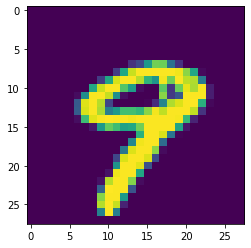

In [66]:
plt.imshow(tl_x_test[3].reshape(28,28))
plt.show()